<a href="https://colab.research.google.com/github/dhdmsdud/TIL/blob/master/MLP_classification_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from tensorflow.keras.datasets   import boston_housing
from tensorflow.keras.models     import Sequential, Model
from tensorflow.keras.layers     import Activation, Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils      import plot_model


from sklearn.model_selection     import train_test_split, KFold
from sklearn.preprocessing   import LabelEncoder , OneHotEncoder , StandardScaler , MinMaxScaler , Binarizer 
from sklearn.datasets            import load_breast_cancer 

import numpy  as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = load_breast_cancer()
type(raw_data)

sklearn.utils.Bunch

In [3]:
raw_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
# 이진분류
raw_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [5]:
raw_data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(raw_data.data, raw_data.target, test_size=0.2, random_state=100)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [8]:
X_train[0]

array([1.305e+01, 1.931e+01, 8.261e+01, 5.272e+02, 8.060e-02, 3.789e-02,
       6.920e-04, 4.167e-03, 1.819e-01, 5.501e-02, 4.040e-01, 1.214e+00,
       2.595e+00, 3.296e+01, 7.491e-03, 8.593e-03, 6.920e-04, 4.167e-03,
       2.190e-02, 2.990e-03, 1.423e+01, 2.225e+01, 9.024e+01, 6.241e+02,
       1.021e-01, 6.191e-02, 1.845e-03, 1.111e-02, 2.439e-01, 6.289e-02])

In [21]:
model = Sequential()

model.add(Dense(30, input_shape=(30, ), activation='sigmoid'))

model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))

model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile(loss='binary_crossentropy', 
              optimizer=SGD(learning_rate=0.01), 
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train , batch_size = 50 , epochs = 200 , validation_data=(X_test, y_test), verbose = 1 )

In [24]:
result = model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.5702


### 교차검증으로 테스트
- K-Fold

In [ ]:
def get_model() :
  model.add( Dense(30 , input_shape=(30 , )))
  model.add( Activation('sigmoid'))

  model.add( Dense(10 , activation='sigmoid'))
  model.add( Dense(10 , activation='sigmoid'))
  model.add( Dense(10 , activation='sigmoid'))

  model.add( Dense(1  , activation='sigmoid'))  
  return model 

fold = KFold(n_splits = 6 )

acc_list = []
for train_idx , val_idx in fold.split(X_train) :
  # print(train_idx , val_idx)
  x_train_fold , x_val_fold = X_train[train_idx] , X_train[val_idx]
  y_train_fold , y_val_fold = y_train[train_idx] , y_train[val_idx] 
  
  model = get_model()
  model.fit(x_train_fold , y_train_fold , epochs = 10 , validation_data = (x_val_fold, y_val_fold))
  

  _, acc = model.evaluate(X_test , y_test)
  acc_list.append(acc)

print(np.mean(acc_list))


### sns.load_dataset('iris')

In [ ]:
# LabelEncoder
# train_test_split
# model activation=relu , output(softmax)

# optimizer = Adam , loss = categorical_crossentropy , acc
# compile
# history = fit

# loss , val_loss , acc , val_acc 시각화

In [ ]:
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue="species", palette="husl")

In [31]:
# type(iris)
# iris.head()
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
X = iris.iloc[:,0:4].values
y = iris.iloc[:,4].values

encoder =  LabelEncoder()
encoder_y = encoder.fit_transform(y)
Y = pd.get_dummies(encoder_y).values
Y

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    random_state=1) 
X_train.shape, y_train.shape, X_test.shape,  y_test.shape

((120, 4), (120, 3), (30, 4), (30, 3))

In [41]:
model = Sequential()

model.add(Dense(64,input_shape=(4,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='Adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_86 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_87 (Dense)             (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [42]:
history = model.fit(X_train, y_train, epochs = 100 , validation_data=(X_test, y_test), verbose = 1 )

Epoch 1/100
4/4 [==============================] - 0s 53ms/step - loss: 1.1523 - accuracy: 0.3950 - val_loss: 1.0968 - val_accuracy: 0.2000
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 1.0114 - accuracy: 0.3492 - val_loss: 0.9775 - val_accuracy: 0.5667
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: 0.9053 - accuracy: 0.6715 - val_loss: 0.9238 - val_accuracy: 0.5667
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 0.8493 - accuracy: 0.6610 - val_loss: 0.8859 - val_accuracy: 0.5667
Epoch 5/100
4/4 [==============================] - 0s 13ms/step - loss: 0.7913 - accuracy: 0.6913 - val_loss: 0.8449 - val_accuracy: 0.5667
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 0.7598 - accuracy: 0.6704 - val_loss: 0.7843 - val_accuracy: 0.5667
Epoch 7/100
4/4 [==============================] - 0s 12ms/step - loss: 0.7070 - accuracy: 0.6777 - val_loss: 0.7327 - val_accuracy: 0.5667
Epoch 8/100
4/4 [===

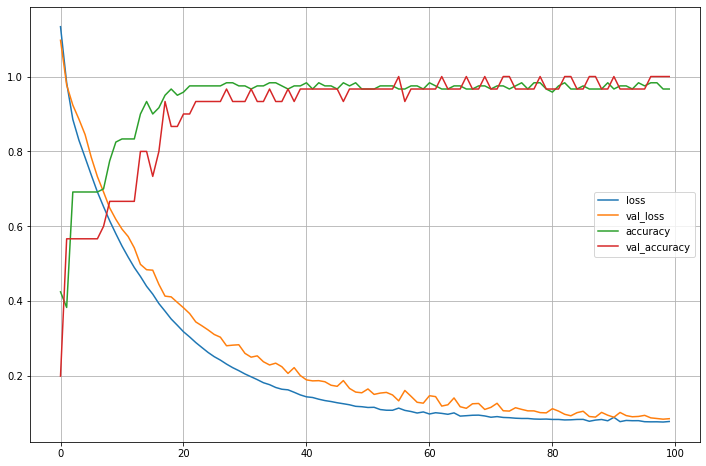

In [43]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['loss','val_loss', 'accuracy','val_accuracy'])
plt.grid()
plt.show()

In [45]:
result = model.evaluate(X_test , y_test) 
print(model.metrics_names)
print('loss' , result[0])
print('acc' , result[1])


1/1 [==============================] - 0s 17ms/step - loss: 0.0862 - accuracy: 1.0000
['loss', 'accuracy']
loss 0.08624251186847687
acc 1.0
